"""
# Atividade de Data Science: Análise de Indicadores Socioeconômicos (INEP 2021)

Este notebook apresenta:

1. Descrição do conjunto de dados (INEP 2021 – Indicadores Socioeconômicos)
2. Leitura do arquivo Excel
3. Data Wrangling: seleção de atributos, tratamento de valores faltantes e inconsistentes
4. Interpretação dos resultados de `info()` e `describe()`
5. Operações de agregação com `groupby`
6. Visualizações de padrões e tendências
7. Exportação do conjunto de dados tratado para Power BI (CSV)
"""

"""
## 1. Descrição do Conjunto de Dados

Os dados referem-se aos indicadores socioeconômicos do Brasil em 2021, disponibilizados pelo INEP. Contém informações como:
- Código e nome da unidade da federação
- Renda média domiciliar per capita
- Percentual de professores com graduação, mestrado e doutorado
- Índice de Desenvolvimento Humano (IDH) municipal
- Taxas de analfabetismo
- Outros indicadores relevantes para avaliação socioeconômica e educacional

O objetivo é preparar o dataset para análise exploratória e posterior criação de dashboards no Power BI.
"""

# %%
# 2. Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurações globais de visualização

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)

# %%
# 3. Leitura do arquivo Excel

In [4]:
file_path = 'data/INSE_2021__brasil.xlsx '

In [7]:
df = pd.read_excel(file_path, sheet_name='INSE_BR_2021')

In [ ]:
# Visualizar as primeiras linhas
df.head()

,NU_ANO_SAEB,TP_TIPO_REDE,TP_LOCALIZACAO,TP_CAPITAL,QTD_ALUNOS_INSE,MEDIA_INSE,PC_NIVEL_1,PC_NIVEL_2,PC_NIVEL_3,PC_NIVEL_4,PC_NIVEL_5,PC_NIVEL_6,PC_NIVEL_7,PC_NIVEL_8
0,2021,0,0,0,5006256,5.05,1.52,11.95,15.08,19.84,19.88,15.55,13.62,2.58
1,2021,0,0,1,954020,5.21,0.67,7.75,13.94,20.46,20.63,16.38,16.50,3.67
2,2021,0,0,2,4052236,5.00,1.76,13.17,15.41,19.66,19.66,15.30,12.78,2.26
3,2021,0,1,0,4512129,5.11,1.12,10.28,14.40,19.89,20.55,16.40,14.57,2.79
4,2021,0,1,1,940231,5.22,0.64,7.58,13.84,20.43,20.69,16.48,16.64,3.70


# %%
# 4. Informação Geral do DataFrame

In [9]:
print("### Info do DataFrame")
df.info()


### Info do DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_ANO_SAEB      63 non-null     int64  
 1   TP_TIPO_REDE     63 non-null     int64  
 2   TP_LOCALIZACAO   63 non-null     int64  
 3   TP_CAPITAL       63 non-null     int64  
 4   QTD_ALUNOS_INSE  63 non-null     int64  
 5   MEDIA_INSE       63 non-null     float64
 6   PC_NIVEL_1       63 non-null     float64
 7   PC_NIVEL_2       63 non-null     float64
 8   PC_NIVEL_3       63 non-null     float64
 9   PC_NIVEL_4       63 non-null     float64
 10  PC_NIVEL_5       63 non-null     float64
 11  PC_NIVEL_6       63 non-null     float64
 12  PC_NIVEL_7       63 non-null     float64
 13  PC_NIVEL_8       63 non-null     float64
dtypes: float64(9), int64(5)
memory usage: 7.0 KB


In [10]:
print("\n### Estatísticas Descritivas")
df.describe()


### Estatísticas Descritivas


,NU_ANO_SAEB,TP_TIPO_REDE,TP_LOCALIZACAO,TP_CAPITAL,QTD_ALUNOS_INSE,MEDIA_INSE,PC_NIVEL_1,PC_NIVEL_2,PC_NIVEL_3,PC_NIVEL_4,PC_NIVEL_5,PC_NIVEL_6,PC_NIVEL_7,PC_NIVEL_8
count,63.0,63.000000,63.000000,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,2021.0,3.000000,1.000000,1.000000,1.262254e+06,4.993651,1.888889,13.830635,15.978095,19.465079,18.409683,14.215397,13.523492,2.688889
std,0.0,2.016065,0.823055,0.823055,1.623459e+06,0.450953,1.858342,8.690147,5.571282,4.502826,3.638981,4.824508,10.262348,3.398115
min,2021.0,0.000000,0.000000,0.000000,7.700000e+01,4.300000,0.050000,0.680000,3.110000,8.040000,12.040000,5.630000,2.720000,0.270000
25%,2021.0,1.000000,0.000000,0.000000,1.974800e+04,4.780000,0.680000,9.380000,14.170000,18.945000,15.470000,12.295000,7.205000,0.825000
50%,2021.0,3.000000,1.000000,1.000000,4.803380e+05,4.970000,1.320000,12.090000,16.720000,20.340000,19.590000,15.250000,10.300000,1.100000
75%,2021.0,5.000000,2.000000,2.000000,2.002194e+06,5.160000,2.150000,16.210000,19.315000,22.360000,21.300000,16.485000,16.570000,3.230000
max,2021.0,6.000000,2.000000,2.000000,5.006256e+06,5.990000,6.140000,30.770000,25.590000,25.900000,29.650000,22.740000,37.640000,12.490000


"""
### Interpretação
- **NU_ANO_SAEB**: Ano de aplicação do indicador.
- **TP_TIPO_REDE**: Tipo de rede (municipal, estadual, federal).
- **TP_LOCALIZACAO**: Localização da escola (urbana/rural).
- **QTD_ALUNOS_INSE**: Quantidade de alunos considerados.
- **MEDIA_INSE**: Média do índice socioeconômico.
- **PC_NIVEL_1** a **PC_NIVEL_8**: Percentual de alunos em cada nível de INSE.

Todas as colunas não apresentam valores nulos para esta tabela.
"""

# %%
# 5. Data Wrangling

# 5.1 Seleção de atributos relevantes

In [ ]:
cols_relevantes = [
    'NU_ANO_SAEB', 'TP_TIPO_REDE', 'TP_LOCALIZACAO',
    'QTD_ALUNOS_INSE', 'MEDIA_INSE',
    'PC_NIVEL_1', 'PC_NIVEL_2', 'PC_NIVEL_3', 'PC_NIVEL_4',
    'PC_NIVEL_5', 'PC_NIVEL_6', 'PC_NIVEL_7', 'PC_NIVEL_8'
]
df_sel = df[cols_relevantes].copy()

NU_ANO_SAEB        0
TP_TIPO_REDE       0
TP_LOCALIZACAO     0
QTD_ALUNOS_INSE    0
MEDIA_INSE         0
PC_NIVEL_1         0
PC_NIVEL_2         0
PC_NIVEL_3         0
PC_NIVEL_4         0
PC_NIVEL_5         0
PC_NIVEL_6         0
PC_NIVEL_7         0
PC_NIVEL_8         0
dtype: int64

In [ ]:
# Confirmar que não há nulos
df_sel.isna().sum()

NU_ANO_SAEB        0
TP_TIPO_REDE       0
TP_LOCALIZACAO     0
QTD_ALUNOS_INSE    0
MEDIA_INSE         0
PC_NIVEL_1         0
PC_NIVEL_2         0
PC_NIVEL_3         0
PC_NIVEL_4         0
PC_NIVEL_5         0
PC_NIVEL_6         0
PC_NIVEL_7         0
PC_NIVEL_8         0
dtype: int64

# %%
"""
## 6. Operações de Agregação

Exemplos:
- Média de `MEDIA_INSE` por tipo de rede
- Média de `MEDIA_INSE` por localidade
"""

# %%
# 6.1 Média de INSE por Tipo de Rede

In [14]:
media_rede = df_sel.groupby('TP_TIPO_REDE')['MEDIA_INSE'].mean().reset_index()
media_rede

,TP_TIPO_REDE,MEDIA_INSE
0,0,4.884444
1,1,5.338889
2,2,4.831111
3,3,4.688889
4,4,5.688889
5,5,4.760000
6,6,4.763333


# 6.2 Média de INSE por Localização

In [17]:
media_local = df_sel.groupby('TP_LOCALIZACAO')['MEDIA_INSE'].mean().reset_index()
media_local

,TP_LOCALIZACAO,MEDIA_INSE
0,0,5.159524
1,1,5.197619
2,2,4.623810


# %%
"""
## 7. Visualizações
"""


# 7.1 Barras: Média de INSE por Tipo de Rede

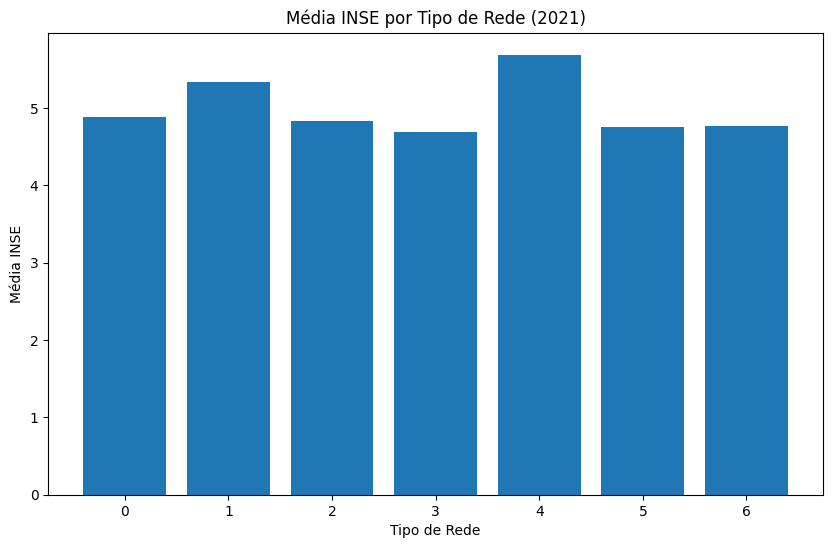

In [18]:
plt.figure()
plt.bar(media_rede['TP_TIPO_REDE'].astype(str), media_rede['MEDIA_INSE'])
plt.title('Média INSE por Tipo de Rede (2021)')
plt.xlabel('Tipo de Rede')
plt.ylabel('Média INSE')
plt.show()

# 7.2 Barras: Média de INSE por Localização

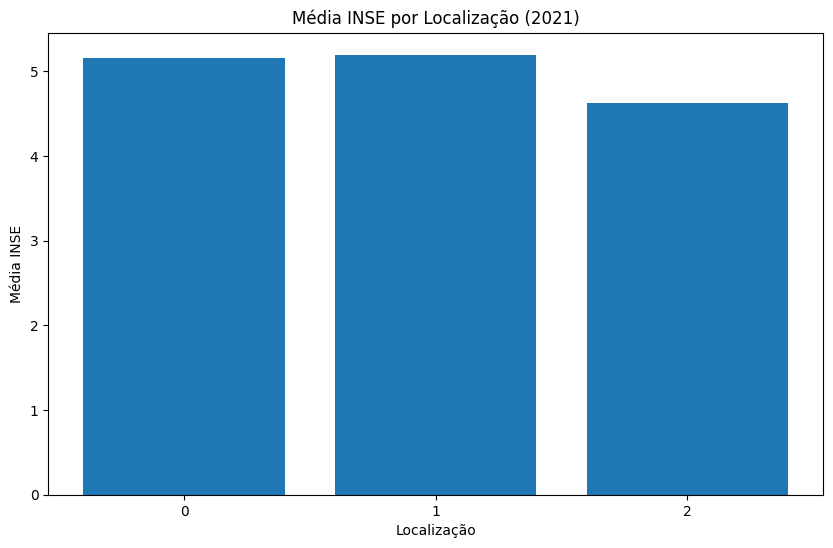

In [19]:
plt.figure()
plt.bar(media_local['TP_LOCALIZACAO'].astype(str), media_local['MEDIA_INSE'])
plt.title('Média INSE por Localização (2021)')
plt.xlabel('Localização')
plt.ylabel('Média INSE')
plt.show()

# 7.3 Distribuição dos Percentuais dos Níveis de INSE
# Agrupar percentual médio para cada nível

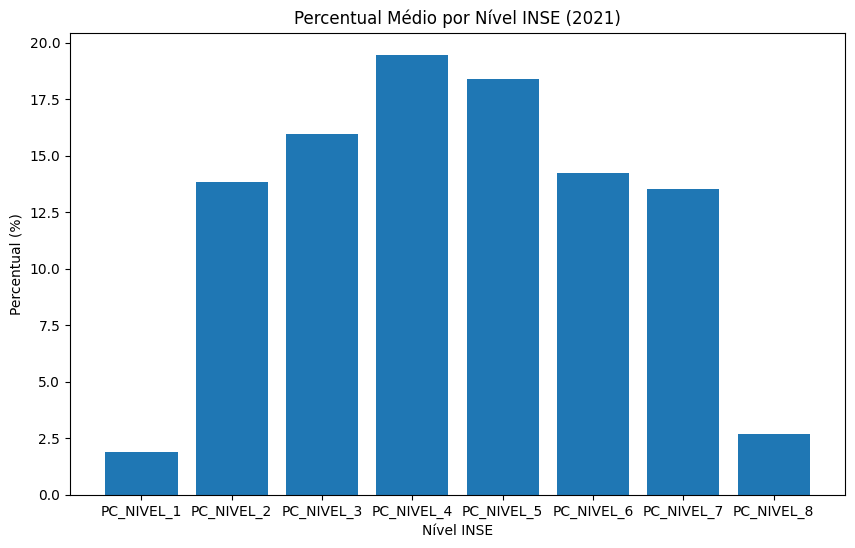

In [20]:
gb = df_sel[[f'PC_NIVEL_{i}' for i in range(1,9)]].mean().reset_index()
gb.columns = ['Nível', 'Percentual']
plt.figure()
plt.bar(gb['Nível'], gb['Percentual'])
plt.title('Percentual Médio por Nível INSE (2021)')
plt.xlabel('Nível INSE')
plt.ylabel('Percentual (%)')
plt.show()

# %%
"""
## 8. Exportação dos Dados Tratados

## Exportar em CSV para uso no Power BI.

"""

In [24]:
output_path = 'data/INSE_2021__brasil.csv '
df_sel.to_csv(output_path, index=False)
print(f"Arquivo tratado salvo em: {output_path}")


Arquivo tratado salvo em: data/INSE_2021__brasil.csv 
